In [1]:
import numpy as np
import pandas as pd

'''from sklearn import '''
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('scenario1.txt', sep='\t',delimiter=None, names = ["TimeStamp", "ProcessCount", "Mean"],error_bad_lines=False, encoding="latin-1")

In [3]:
df2 = pd.read_csv('scenario2.txt', sep='\t',delimiter=None, names = ["TimeStamp", "ProcessCount", "Mean"],error_bad_lines=False, encoding="latin-1")

In [4]:
frames = [df1, df2]

In [5]:
df = pd.concat(frames)

In [6]:
df.index = df.TimeStamp

In [7]:
df.head()

,TimeStamp,ProcessCount,Mean
TimeStamp,,,
21601,21601,2,0.052
21602,21602,1,0.034
21603,21603,5,0.077
21604,21604,4,0.064
21605,21605,1,0.138


For each scenario, please answer the following questions.
Note that we define "week 2" to begin at second 626400 (6 am on the 8th day).

1) How much has the mean response time (specifically, the mean of the response
times for each individual request) changed from week 1 to week 2?

In [8]:
df.Mean.describe()

count    2.375101e+06
mean     2.184411e-01
std      8.853216e-01
min      1.500000e-02
25%      8.800000e-02
50%      1.230000e-01
75%      1.980000e-01
max      4.725000e+01
Name: Mean, dtype: float64

In [9]:
wk1 = df[df.index < 626400]
wk2 = df[df.index >= 626400]

In [10]:
def weighted_mean_response_time(df):
    return (df['ProcessCount'] * df['Mean']).sum()/\
                df['ProcessCount'].sum()

    
def weight_mean_response_times(df):
    return df['ProcessCount'] / df['ProcessCount'].sum()

difference = weighted_mean_response_time(wk2) - weighted_mean_response_time(wk1)
print('The difference between first week and the second week approximately is: ~{:.2f}'.format(
difference))

The difference between first week and the second week approximately is: ~0.19


2.Create a plot illustrating the probability distribution of the amount of server time it takes to process a request (excluding the time the request spends waiting in the queue). How would you describe the distribution?

In [11]:
wkk = df['Mean']

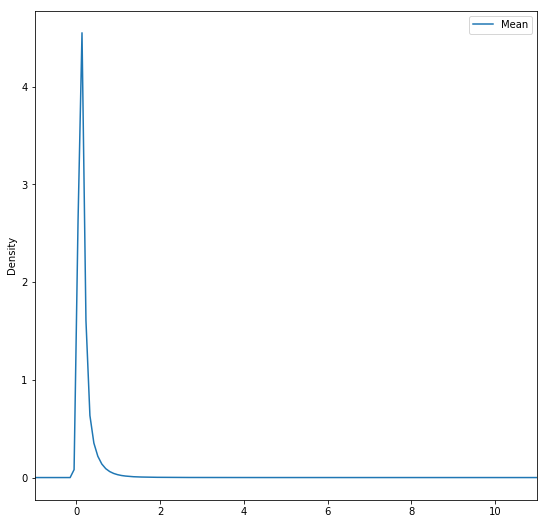

In [12]:
pd.DataFrame(wkk).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

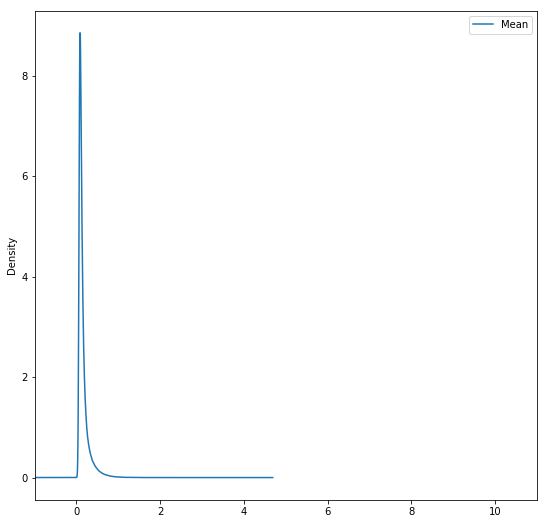

In [13]:
pd.DataFrame(wk1.Mean).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

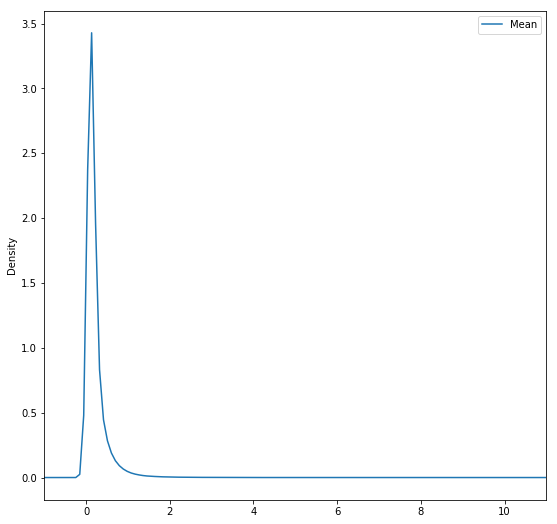

In [15]:
pd.DataFrame(wk2.Mean).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11))

So we get a lognormal distribution for the Mean response time for requests processed by the server

Qs. 3 - Propose a potential cause for the change in response times. 

In [16]:
wk1.Mean.describe()

count    1.186672e+06
mean     1.583300e-01
std      1.328299e-01
min      1.500000e-02
25%      8.600000e-02
50%      1.160000e-01
75%      1.760000e-01
max      3.132000e+00
Name: Mean, dtype: float64

In [17]:
wk2.Mean.describe()

count    1.188429e+06
mean     2.784635e-01
std      1.241613e+00
min      1.500000e-02
25%      9.100000e-02
50%      1.310000e-01
75%      2.250000e-01
max      4.725000e+01
Name: Mean, dtype: float64

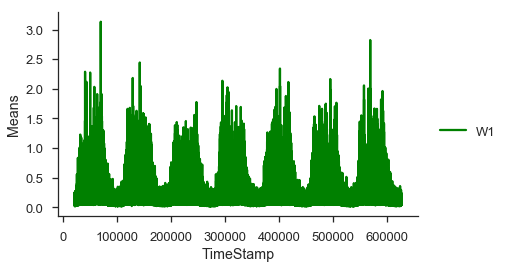

In [22]:
import seaborn as sns
sns.set(style='ticks', context='talk')

wk1.Mean.plot(label='W1',color = 'green')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Means")
sns.despine()

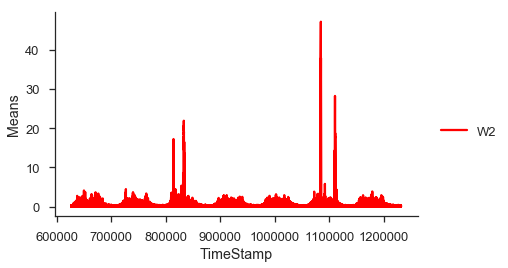

In [21]:
wk2.Mean.plot(label='W2',color = 'red')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Means")
sns.despine()


Qs. 3a - Give a qualitative answer as if you were explaining it to a client

Ans: This is a discussion that one can have with a client. The client can share infrmation about any additions or changes in wk2 which can help with the root cause analysis. Some of the potential reasons for the change in mean processing time between wk1 and wk2 are:

Software Related: i. Increase in number of requests to an application(s) residing on the server which leads the server to take more time per second to process these requests.
                  ii. Change in the process architecture which leads to higher latency per process
                  iii. Increse in number of customers (the average number of requests have increased). This could be due to an existing special event or promotion by the client organization.
                   iv. Error in log file due to a bug intoriduced by softawre update.
                   
 Hardware Related: i. Change in hardware specification

Qs. 3b - A quantitative answer as if you were explaining it to a statistician. Create 1 or 2 plots to
support and illustrate your argument.

Ans: We notice in the graphs and statictics collected above that despite same number of time stamps evaluated, , there is a considerable difference in Wk1 and Wk2 for the following:
Mean, Standard Dev, left and right percentiles of the lognormal graph, and maximum average time.